In [1]:
import matplotlib.pyplot as plt
from lvmsurveysim import IFU, Telescope
from lvmsurveysim.schedule import ObservingPlan, Simulator, TileDB, OpsDB
from lvmsurveysim.target import TargetList
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.visualization import PercentileInterval, SqrtStretch, ImageNormalize

In [2]:
with open('./lmc.yaml', 'r') as f:
    print(f.read())

LMC:
    coords: [79.5135633, -68.5271292]
    region_type: circle
    frame: icrs
    region_params:
        r: 5.0
    priority: 30
    observatory: LCO
    telescope: LVM-160
    max_airmass: 2.00
    min_shadowheight: 1.0
    exptime: 1200
    n_exposures: 9
    min_exposures: 3
    min_moon_dist: 45
    max_lunation: 0.25
    overhead: 1.1
    tiling_strategy: center_first
    tile_overlap: 0.0416
    group: ["MCs"]



In [3]:
targets = TargetList(target_file='./lmc.yaml')
OpsDB.init()
print('Tiling Survey ...')
tiledb = TileDB(targets)
tiledb.tile_targets()
OpsDB.create_tables(drop=True)
OpsDB.save_tiledb(tiledb, fits=True, path='lmc_tiles', overwrite=True)

Tiling Survey ...
Tiling target LMC


507

In [4]:
tbl = tiledb.tile_table
tbl

TileID,TargetIndex,Target,Telescope,RA,DEC,PA,TargetPriority,TilePriority,AirmassLimit,LunationLimit,HzLimit,MoonDistanceLimit,TotalExptime,VisitExptime,Status
int64,int64,str3,str7,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,int64,int64
1000001,0,LMC,LVM-160,77.06208685025227,-73.3844237522551,2.289502746988125,30,2,2.0,0.25,1.0,45,10800,3600,0
1000002,0,LMC,LVM-160,79.60475286391744,-73.39840834700317,359.9148321886264,30,2,2.0,0.25,1.0,45,10800,3600,0
1000003,0,LMC,LVM-160,82.14710173434824,-73.38226483553319,357.5404792333781,30,2,2.0,0.25,1.0,45,10800,3600,0
1000004,0,LMC,LVM-160,73.34034798611202,-73.09765877696223,5.762361716790674,30,2,2.0,0.25,1.0,45,10800,3600,0
1000005,0,LMC,LVM-160,75.83743534060999,-73.15594753098827,3.4320186932429895,30,3,2.0,0.25,1.0,45,10800,3600,0
1000006,0,LMC,LVM-160,78.34691490615114,-73.184634089145,1.0892647045392483,30,3,2.0,0.25,1.0,45,10800,3600,0
1000007,0,LMC,LVM-160,80.8603497904755,-73.1835667092755,358.74254945233247,30,3,2.0,0.25,1.0,45,10800,3600,0
1000008,0,LMC,LVM-160,83.36921960126784,-73.15275105593645,356.40040613667986,30,3,2.0,0.25,1.0,45,10800,3600,0
1000009,0,LMC,LVM-160,85.86510028239444,-73.09235005130581,354.0712716219959,30,2,2.0,0.25,1.0,45,10800,3600,0


In [5]:
ifu = IFU.from_config()
lvm160 = Telescope.from_config('LVM-160')

In [6]:
lvm160.plate_scale

<Quantity 348.42060811 arcsec / mm>

In [7]:
# Load SHASSA image
dat, hdr = fits.getdata('013.fl.fits.gz', header=True)
wcs = WCS(hdr)
print(dat.shape)

(998, 1014)


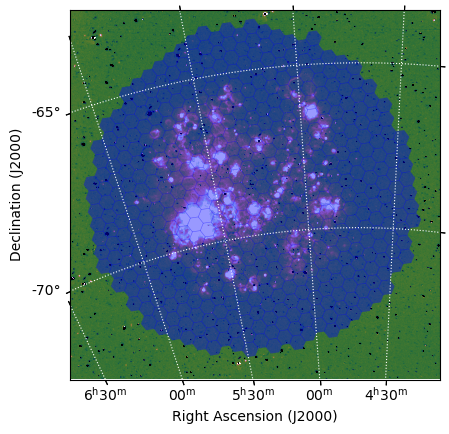

In [12]:
ax = plt.subplot(projection=wcs)
norm = ImageNormalize(dat, interval=PercentileInterval(98),
                      stretch=SqrtStretch())
ax.imshow(dat, origin='lower', cmap='cubehelix', norm=norm)
ax.coords[0].set_axislabel('Right Ascension (J2000)')
ax.coords[1].set_axislabel('Declination (J2000)')
ax.grid(color='white', ls=':')
ax.set_xlim(50, 900)
ax.set_ylim(140, 990)
for p in tbl:
    patch = ifu.get_patch(scale=lvm160.plate_scale, centre=[p['RA'], p['DEC']], pa=p['PA'],
                            edgecolor='None', linewidth=0.0, alpha=0.4, facecolor='b',
                            transform=ax.get_transform('fk5'))[0]
    ax.add_patch(patch)
# # Coordinates given in Google form
# c0 = SkyCoord('18h02m31.384s', '-22d57m57.6s')
# ax.scatter(c0.ra.deg, c0.dec.deg, transform=ax.get_transform('fk5'), s=300, 
#            marker=(5,2), facecolor='white')
# c1 = SkyCoord('18h01m', '-23d17m')
# ax.scatter(c1.ra.deg, c1.dec.deg, transform=ax.get_transform('fk5'), s=300, 
#            marker=(5,2), facecolor='white')